In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

/opt/anaconda3/envs/ML_practice/lib/python3.11/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
print(len(x_train), len(x_test))

50000 10000


In [4]:
print(xa.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [5]:
classes = [ 'airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

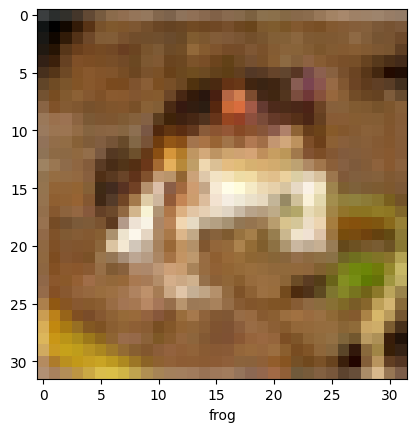

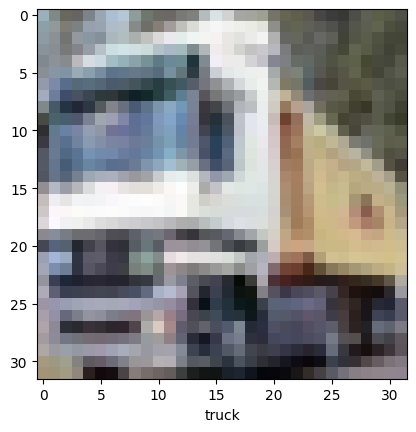

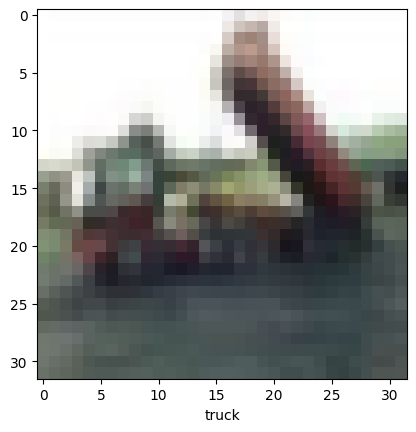

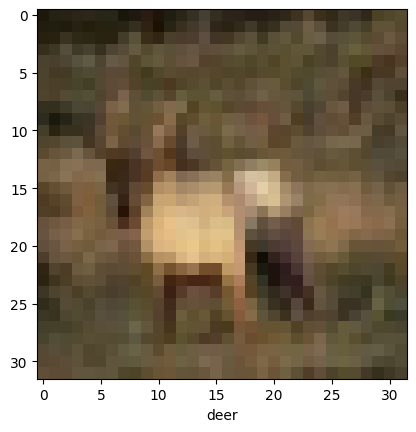

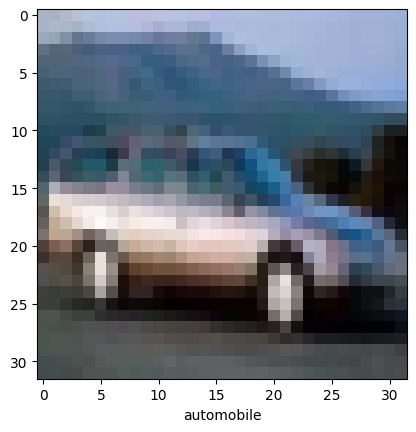

In [6]:
%matplotlib inline

for i in range(5):
    plt.imshow(x_train[i])
    plt.xlabel(classes[y_train[i][0]])
    plt.show()

In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
print(y_train[:5])

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

print(y_train[:5])

[[6]
 [9]
 [9]
 [4]
 [1]]
[6 9 9 4 1]


In [10]:
cnn = keras.Sequential([

    #cnn
    keras.layers.Conv2D(filters = 32, padding = 'same', kernel_size = (3,3), input_shape = (32,32,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),

    #ann
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

cnn.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4408 - loss: 1.5356
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.5914 - loss: 1.1572
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6497 - loss: 0.9967
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6906 - loss: 0.8892
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7154 - loss: 0.8141
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7340 - loss: 0.7486
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7562 - loss: 0.6958
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7693 - loss: 0.6491
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7868 - loss: 0.6060
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7975 - loss: 0.5681


In [11]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7120 - loss: 0.9095


[0.9094768762588501, 0.7120000123977661]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


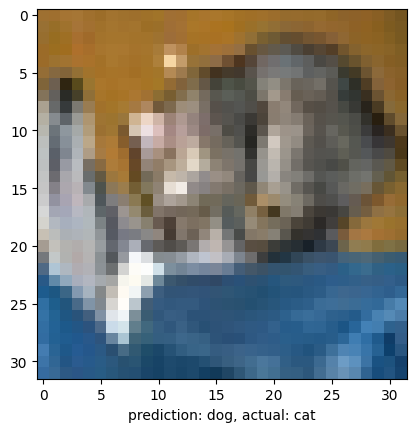

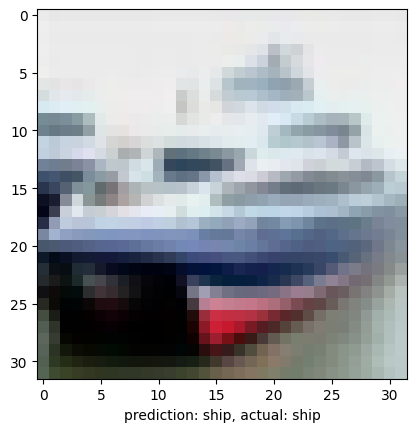

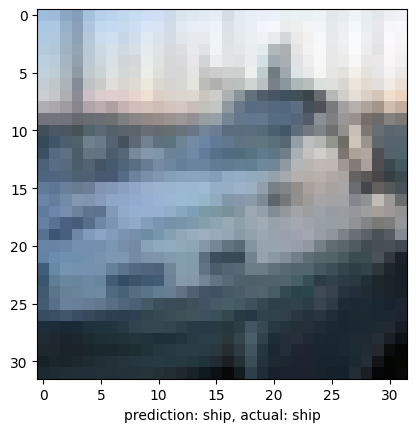

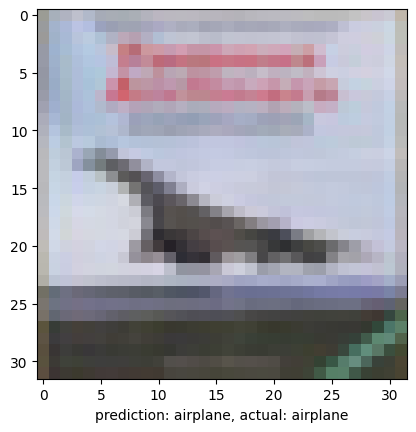

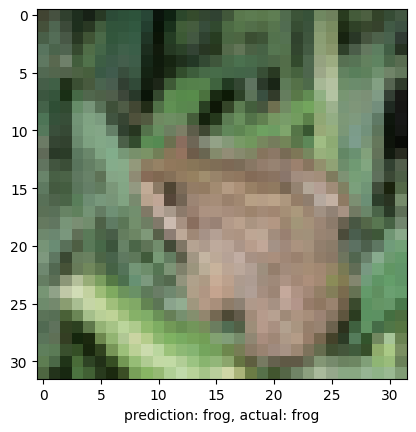

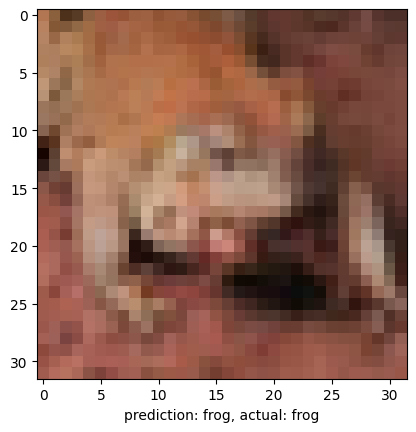

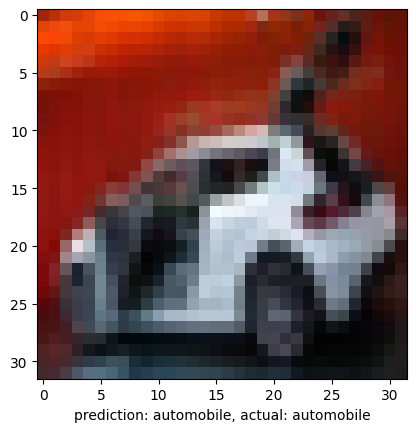

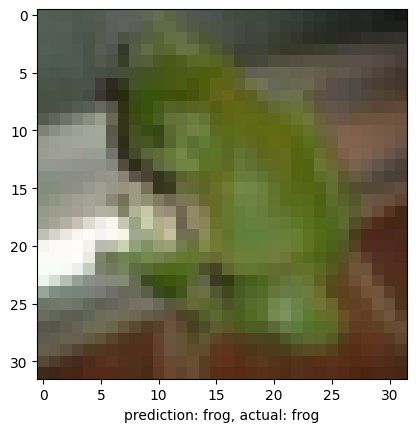

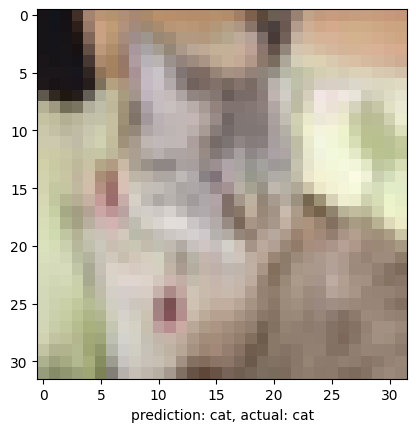

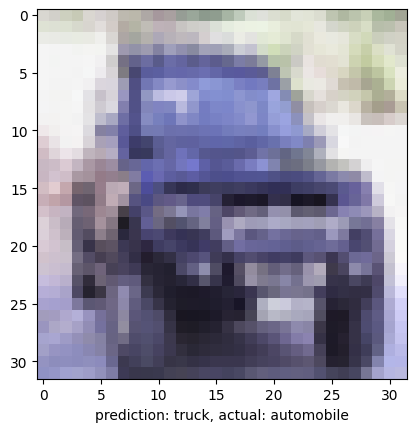

In [24]:
val = cnn.predict(x_test)
for i in range(10):
    x = classes[np.argmax(val[i])]
    y = y_test[i]
    plt.imshow(x_test[i])
    plt.xlabel((f'prediction: {x}, actual: {classes[y]}'))
    plt.show()